Se usó ChatGPT y GitHub copilot para el brainstorming y el autocompletado.

[{'F', 'D', 'E'}, {'C', 'B', 'A'}, {'H', 'I', 'G'}]


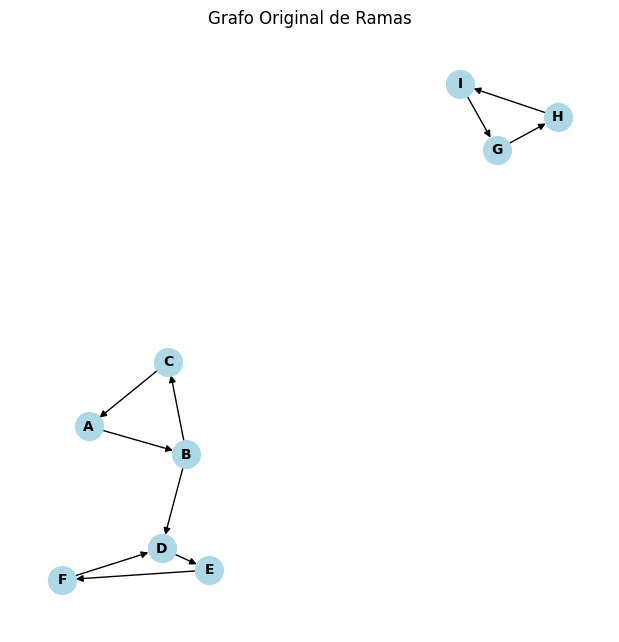

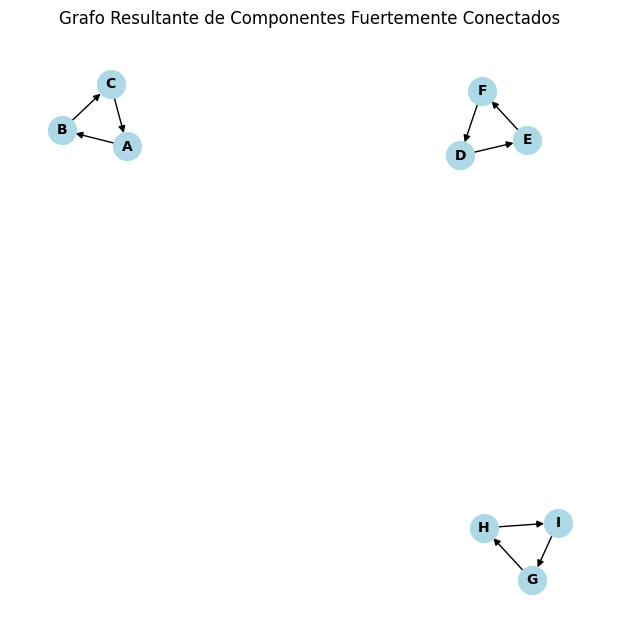

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

def read_graph_from_file(filename):
    """Leer el archivo y construir el grafo dirigido."""
    graph = nx.DiGraph()
    with open(filename, 'r') as file:
        for line in file:
            # Separar la línea y capturar las ramas
            parts = line.strip().split(' ')
            if len(parts) >= 5:  # Asegúrate de que la línea contenga suficientes partes
                source = parts[1]  
                target = parts[5]  
                graph.add_edge(source, target)  # Agregar la dependencia al grafo
    return graph

# Se utilizo SCC porque nos permite conocer si se pueden gestionar juntos a través de la verificación de si todos son dependientes entre sí.
def find_strongly_connected_components(graph):
    return list(nx.strongly_connected_components(graph))

def draw_graph(graph, title):
    """Dibujar el grafo."""
    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(graph)  # Posiciones para todos los nodos
    nx.draw(graph, pos, with_labels=True, node_size=400, node_color='lightblue', font_size=10, font_color='black', font_weight='bold')
    plt.title(title)
    plt.show()

    
filename = 'ramas.txt'
graph = read_graph_from_file(filename)

# Encontrar componentes fuertemente conectados
strongly_connected_components = find_strongly_connected_components(graph)

# Imprimir resultados en consola
print(strongly_connected_components)

# Dibujar el grafo original
draw_graph(graph, "Grafo Original de Ramas")

# Dibujar el grafo resultante (de los componentes)
component_graph = nx.DiGraph()
for component in strongly_connected_components:
    for node in component:
        component_graph.add_node(node)
    for node in component:
        for neighbor in graph.neighbors(node):
            if neighbor in component:
                component_graph.add_edge(node, neighbor)

draw_graph(component_graph, "Grafo Resultante de Componentes Fuertemente Conectados")
